### Step 1: Importing necessary modules

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import random
random.seed(42)


### Step 2:  loading data file

In [3]:
df= pd.read_csv('./ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [4]:
#number of rows and columns in df
df.shape

(294478, 5)

In [5]:
#no missing value present and user_id and converted are integer type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


In [7]:
#unique value in each columns
unique_col=df.nunique()
unique_col

user_id         290584
timestamp       294478
group                2
landing_page         2
converted            2
dtype: int64

In [6]:
# percent of user converted that is converted =1
df[df.converted==1].user_id.count()/df.shape[0]
# or using mean()
df.converted.mean()

0.11965919355605512

In [7]:
#number of time new page and treatment don't line up
# so it means a. we need to get the number of landing page= new_page and group is not treatment
# b. get the number of landing page=not new_page(old_page) but group is treatment
df[(df.landing_page=='new_page')& (df.group !='treatment')].user_id.count()\
+ df[(df.landing_page!='new_page')& (df.group=='treatment')].user_id.count()

3893

In [8]:
#missing value
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

In [9]:
# adding these value to new dataset df2
df2=df.drop(df[((df.landing_page == 'new_page') & (df.group != 'treatment')) | ((df.landing_page != 'new_page') & (df.group == 'treatment'))].index)

In [10]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

In [11]:
df2.user_id.nunique()

290584

In [12]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290585 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       290585 non-null  int64 
 1   timestamp     290585 non-null  object
 2   group         290585 non-null  object
 3   landing_page  290585 non-null  object
 4   converted     290585 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


In [13]:
#what ids are repeated
df2.user_id[df2.user_id.duplicated(keep=False)]

1899    773192
2893    773192
Name: user_id, dtype: int64

In [14]:
# at what index duplicated user_id is
df2[df2.user_id.duplicated(keep=False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


In [15]:
#Remove one of the rows with a duplicate user_id, but keep your dataframe as df2
# we can remove duplicates in multiple ways
# removing by index, removing by first or last entry as well as by unique column timestamp

df2=df2[df2.timestamp !='2017-01-09 05:37:58.781806']

In [16]:
df2.user_id.nunique()

290584

What is the probability of an individual converting regardless of the page they receive?

In [17]:
df2.converted.mean()

#alternatively
df2.describe().loc['mean'].converted

0.11959708724499628

 Given that an individual was in the control group, what is the probability they converted?

In [18]:

# logic: query the converted column where group column value is control and take mean
df2.converted[df2.group == 'control'].mean()

0.1203863045004612

Given that an individual was in the treatment group, what is the probability they converted?

In [19]:
#here we do it for treatment instead of control
df2.converted[df2.group == 'treatment'].mean()

0.11880806551510564

What is the probability that an individual received the new page?


In [20]:
df2[df2.landing_page=='new_page'].count()/df2.shape[0]

user_id         0.500062
timestamp       0.500062
group           0.500062
landing_page    0.500062
converted       0.500062
dtype: float64

Use the results in the previous two portions of this question to suggest if you think there is evidence that one page leads to more conversions? Write your response below.

**-Given the probability that an individual received the new page is 0.50006, suggests that there is an equal chance that an individual received the old page at the same time.  
-Besides, the probability of conversion from control group and treatment group is almost similar. Just different at 3rd decimal point.  
-Within such circumstances we can not confidently say that one page leads to more conversions. In fact, it is quite the opposite.**

### Part II A/B Test

- 1. For now, consider you need to make the decision just based on all the data provided. If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be? You can state your hypothesis in terms of words or in terms of $p_{old}$ and $p_{new}$, which are the converted rates for the old and new pages.

-**Null Hypothesis**: The probability of old page better than new page is greater or equal to probability of new page.

-**Alternative Hypothesis**: The probability of new page being better than new page is less than that of a new page.


- 2. Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the converted success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the converted rate in ab_data.csv regardless of the page.


Use a sample size for each page equal to the ones in ab_data.csv.


Perform the sampling distribution for the difference in converted between the two pages over 10,000 iterations of calculating an estimate from the null.

a. What is the convert rate for $p_{new}$ under the null?


In [21]:
# convert rate is how many users converted (i.e. converted = 1)
p_new = df2.converted.mean()
p_new

0.11959708724499628

b. What is the convert rate for $p_{old}$ under the null?

In [22]:
p_old=df2.converted.mean()
p_old

0.11959708724499628

What is $n_{new}$?

In [23]:
# number of users who got the new page (i.e. group = treatment)
n_new = df2[df2.group == 'treatment'].count()[0]
n_new

145310

what is $n_{old}$ ?

In [24]:
#number of users who remained with old page( that is group= control)

n_old=df2[df2.group=='control'].count()[0]
n_old

145274

Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null. Store these $n_{new}$ 1's and 0's in new_page_converted.

NOTE:

Below few cells will see alternative method, please run both of those in two different runs. They both give different results!
As a matter of fact they should not.

The difference will be visible in the histogram and in p-value

In [25]:
# simulating n_new transaction that have probability of receiving 
#new page, using binomial gives output as the number of 1's

new_page_converted= np.random.binomial(1,p_new,n_new)
new_page_converted.mean()

0.12058357993255799

In [27]:
#alternatively
new_converted_simulation= np.random.binomial(n_new,p_new,10000)/n_new
new_converted_simulation.mean()

0.11960918381391507

Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null. Store these $n_{old}$ 1's and 0's in old_page_converted.

In [28]:
old_page_converted=np.random.binomial(1,p_old,n_old)
old_page_converted.mean()

0.11797018048652891

In [29]:
#alternatively
old_converted_simulation=np.random.binomial(n_old,p_old,10000)/n_old
old_converted_simulation.mean()

0.11959655272106502

Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f)

In [30]:
p_new=new_page_converted.mean()
p_old=old_page_converted.mean()
p_new-p_old

0.002613399446029077

In [31]:
#alternatively
new_converted_simulation.mean()-old_converted_simulation.mean()

1.2631092850046155e-05

Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated above. Store all 10,000 values in p_diffs.

In [32]:

p_diffs = []
for _ in range(10000):
    new_page_converted = np.random.binomial(1,p_new,n_new)  # bootstrapping
    old_page_converted = np.random.binomial(1,p_old,n_old) # bootstrapping
    p_diffs.append(new_page_converted.mean() - old_page_converted.mean())

In [33]:
# alternatively
p_diffs_alt = new_converted_simulation - old_converted_simulation


Plot a histogram of the p_diffs. Does this plot look like what you expected?

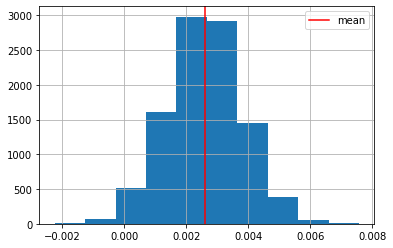

In [36]:
# convert p_diffs to numpy array for array based computations in the future
p_diffs = np.array(p_diffs)

# histogram
plt.hist(p_diffs)
plt.grid()
plt.axvline(p_diffs.mean(), color='r', label='mean')
plt.legend();

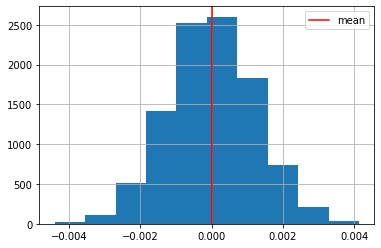

In [37]:
#alternatively
# histogram
plt.hist(p_diffs_alt)
plt.grid()
plt.axvline(p_diffs_alt.mean(), color='r', label='mean')
plt.legend();

As expected the mean is very close to 0.

j. What proportion of the p_diffs are greater than the actual difference observed in ab_data.csv?

In [38]:
actual_diff = df2.converted[df2.group == 'treatment'].mean() - df2.converted[df2.group == 'control'].mean()
(actual_diff < p_diffs).mean()

0.9995

In [39]:
# alternatively
actual_diff = df2.converted[df2.group == 'treatment'].mean() - df2.converted[df2.group == 'control'].mean()
(actual_diff < p_diffs_alt).mean()

0.9068

This is p-value.   
p-value is the probability of observing your statistics (one or more extreme in favour of alternative) if the null hyothesis is true.  
In our case p-value is more than 50% so we can confidently say that we fail to reject null hypothesis.

In [40]:
import statsmodels.api as sm

convert_old = df2[df2.group == 'control'].converted.sum()
convert_new = df2[df2.group == 'treatment'].converted.sum()
n_old = df2[df2.group == 'control'].converted.count()
n_new = df2[df2.group == 'treatment'].converted.count()

In [41]:
# based upon the documentation
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='smaller')
z_score, p_value

(1.3109241984234394, 0.9050583127590245)

- A z-score represents how many standard deviations away our data point is from the mean
- A positive z-score suggests that our data point is on the right side of the mean line on the bell curve
- p-value of 0.9050 is very close to the p-value we computed earlier in part j.
- With this computation, we can confidently say we fail to reject null hypothesis

**Part III - A regression approach**
1. In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.


a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

This is a case of Logistic Regression. In this scenario, we want to predict something that has only two possible outcomes.

b. The goal is to use statsmodels to fit the regression model you specified in part a. to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received. Add an intercept column, as well as an ab_page column, which is 1 when an individual receives the treatment and 0 if control.

In [42]:
# copy the dataframe to a new one, for clarity
df2_copy = df2.copy()
# another sanity check, if True, go ahead
df2_copy.shape == df2.shape

True

In [43]:
# add an intercept
df2_copy['intercept'] = 1

# using pd.get_dummies to convert the 'landing_page' and 'group' to 1s and 0s
df2_copy[['landing_page_new', 'landing_page_old']] = pd.get_dummies(df2_copy['landing_page'])
df2_copy[['ab_page_control','ab_page_treatment']] = pd.get_dummies(df2_copy['group'])

In [44]:
# here, we will use landing_page_old and ab_page_control as our baselines, therefore remove those
df2_copy.drop(['landing_page_old','ab_page_control'], axis=1, inplace=True)
df2_copy.head()

,user_id,timestamp,group,landing_page,converted,intercept,landing_page_new,ab_page_treatment
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,0


c. Use statsmodel to import your regression model. Instantiate the model, and fit the model usig the two columns you created in part **b.** to predict whether or not an individual converts.

In [45]:
logit_mod=sm.Logit(df2_copy['converted'],df2_copy[['intercept','ab_page_treatment']])
results=logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


provide the summary of your model below and use it as necessary to answer the following question

In [47]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Sun, 20 Sep 2020   Pseudo R-squ.:               8.077e-06
Time:                        13:16:11   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
intercept            -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page_treatment    -0.0150      0.011     -1.311      0.190      -0.037       0.007
=====================================================================================
"""

In [48]:
#interprete the coefficients
1/np.exp(results.params[1])

1.0151020136964717

In [49]:
#
# additional: question posed by previous reviewer
# how to get p-value as if it were a one-tailed test
1-0.190/2

0.905

For each 1 unit decrease in ab_page_treatment, conversion is 1.015 time likely holding all the other variables constant. Which is not really why we would launch a new_page!
e. What is the p-value associated with ab_page? Why does it differ from the value you found in the Part II?

Hint: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the Part II?

As we already built the base for z-score and p-value in part-m, this p-value is different of course.
The logistic regression is two-tailed case. We are exploring only two possible outcomes and it can go either way.
Interesting part to observe is z-score, absolute of which confirms the number in part-m.
The null and alternative hypothesis associated with regression model will be as following:$$ H_{0}: p_{old} - p_{new} = 0$$  
$$ H_{0}: p_{old} - p_{new} \neq 0$$

In [51]:

# duration of the experiment
duration = np.array(pd.to_datetime(df.timestamp).sort_values(ascending=True))
td = duration[-1] - duration[0]
days = td.astype('timedelta64[D]')
days / np.timedelta64(1, 'D')

21.0

**There can be many other factors that can be taken into consideration to add into our regression model.**

- One of the first to consider would be the duration. The duration of this experiment was 21 days. Too short, it would be advisable to increase the duration
- Geographic location is another important factor. If the page is available in multiple languages, for example, it can diversify the sample
- Parameters like click through rate is another factor to consider

Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv dataset** and merge together your datasets on the approporiate rows. 

Does it appear that country had an impact on conversion? Don't forget to create dummy variables for these country columns - Hint: You will need two columns for the three dummy varaibles. Provide the statistical output as well as a written response to answer this question.

In [54]:
countries_df=pd.read_csv('./countries.csv')
df_new=countries_df.set_index('user_id').join(df2.set_index('user_id')
                                             ,how='inner')
df_new.head()

,country,timestamp,group,landing_page,converted
user_id,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0


In [55]:
# Create the necessary dummy variables
df_new[['canada','uk','us']] = pd.get_dummies(df_new['country'])

In [57]:
#lets consider Us being our baseline , therefore we drop US
df_new.drop(['us'],axis=1,inplace=True)

we would now like to look at an interaction between page and country to see if there significant effects on conversion. Create the necessary additional columns, and fit the new model.

Provide the summary results, and your conclusions based on the results.

In [58]:
df_new.head()

,country,timestamp,group,landing_page,converted,canada,uk
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,0,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,0,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,1
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,0,1


In [60]:
#fitting linear model
df_new['intercept']=1
logit_mod=sm.Logit(df_new['converted'],df_new[['intercept','canada','uk']])
results=logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


In [61]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Sun, 20 Sep 2020   Pseudo R-squ.:               1.521e-05
Time:                        13:42:36   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9967      0.007   -292.314      0.000      -2.010      -1.983
canada        -0.0408      0.027     -1.518      0.129      -0.093       0.012
uk             0.0099      0.013      0.746      0.456      -0.016       0.036
==============================================================================
"""

In [62]:
1/np.exp(-0.0408), np.exp(0.0099)

(1.0416437559600236, 1.0099491671175422)

### Conclusions
Within the framework this project, we tried to understand whether the company should implement a new page or keep the old page with following:

**Probability based approach**  
**A/B test**  
**Regression approach**  

#### Probability based approach:

We found that probability of an individual receiving the new page is 0.5001
Meaning, there is almost the same chance that an individual received the old page

#### A/B test:

In A/B test we set up our hypothesis to test if new page results in better conversion or not  
We simulated our user groups with respect to conversions
We found the p_value to be 0.8879  
With such a p-value, we failed to reject null hypothesis
By using the built-in stats.proportions_ztest we computed z-score and p-value which confirmed our earlier p-value and failure to reject null hypothesis  

#### Regression Approach:

- We looked at exploring two possible outcomes. Whether new page is better or not.  
- With logistic regression results, we again encountered same z-score as well as p-value of 0.190, corresponding two-tailed case  
- By further adding geographic location of the users, we tried to find if any specific country had an impact on conversion
- The result gave a similar outlook and suggested that the countries have no impact on the conversion rate.

#### Consideration:

- We also looked at the duration of the experiment (21 days).
- This is a relatively short period of time to run the A/B test.
- Due to Change aversion effect, a group of users may give an unfair advantage to the older page
- Similarly, due to Novelty effect, users may give an unfair advantage to the newer page